<a href="https://colab.research.google.com/github/MassloveDen/Neural-Network/blob/main/Cats_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.python.keras.applications import VGG16
from tensorflow.python.keras.optimizers import Adam

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications import VGG16
from keras.optimizers import Adam

In [3]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import zipfile
import random
import tensorflow as tf

In [ ]:
local_zip = '/content/drive/MyDrive/train/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/training')
zip_ref.close()


In [6]:
print('No. of Training Images: ', len(os.listdir('/content/training/train')))

No. of Training Images:  25000


In [7]:
os.listdir('/content/training/train')[:10]

['cat.1148.jpg',
 'cat.4183.jpg',
 'dog.3746.jpg',
 'cat.12426.jpg',
 'cat.9324.jpg',
 'dog.3095.jpg',
 'cat.12298.jpg',
 'dog.9661.jpg',
 'cat.6313.jpg',
 'dog.5871.jpg']

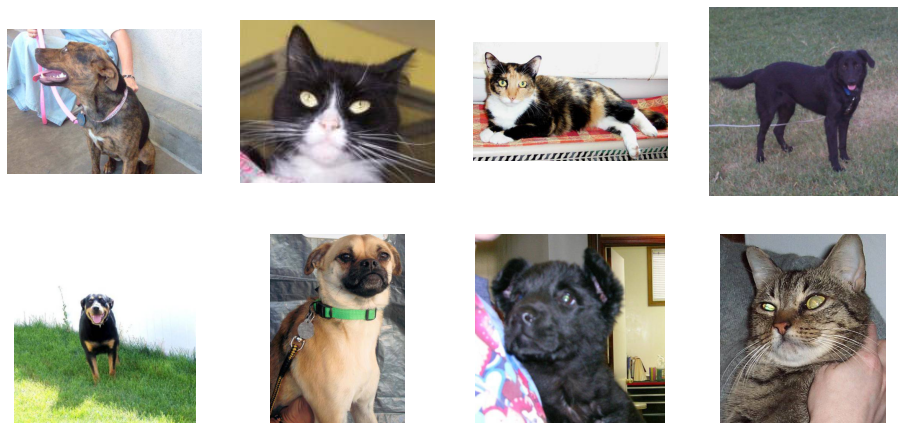

In [8]:
plt.figure(figsize=(16,16))

images = os.listdir('/content/training/train')
for i in range(8):
    img = random.choice([x for x in images])
    fig = plt.subplot(4,4,i+1)
    fig.axis('off')
    img = mpimg.imread(os.path.join('/content/training/train', img)) 
    fig.imshow(img)

In [9]:
local_zip = '/content/drive/MyDrive/val/cats_dogs_dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/Cats_dogs')
zip_ref.close()

In [16]:
local_zip = '/content/drive/MyDrive/test/test1.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/test')
zip_ref.close()

In [17]:
print('No. of Testing Images: ',len(os.listdir('/content/test/test1')))

No. of Testing Images:  12500


In [14]:
print('No. of Testing Images: ',len(os.listdir('/content/jpg')))

No. of Testing Images:  3385


In [13]:
import glob
import shutil
from glob import glob

source = '/content/Cats_dogs/'
target = '/content/jpg'

for f_name in glob(source + '*.jpg'):
    shutil.copy2(f_name, target)

In [15]:
os.listdir('/content/jpg')[:10]

['Birman_133.jpg',
 'Egyptian_Mau_131.jpg',
 'British_Shorthair_111.jpg',
 'keeshond_112.jpg',
 'havanese_133.jpg',
 'havanese_152.jpg',
 'yorkshire_terrier_117.jpg',
 'Persian_193.jpg',
 'english_cocker_spaniel_177.jpg',
 'keeshond_162.jpg']

In [18]:
train_dir = '/content/training/train'
# Каталог с данными для проверки
val_dir = '/content/jpg'
# Каталог с данными для тестирования
test_dir = '/content/test/test1'
# Размеры изображения
img_width, img_height = 150, 150
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)
# Размер мини-выборки
batch_size = 64
# Количество изображений для обучения
nb_train_samples = 25000
# Количество изображений для проверки
nb_validation_samples = 3385
# Количество изображений для тестирования
nb_test_samples = 12500

In [19]:
vgg16_net = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [20]:
vgg16_net.trainable = False

vgg16_net.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [21]:
model = Sequential()
model.add(vgg16_net)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.add(vgg16_net)

In [ ]:
model.summary()

In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [25]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense

In [27]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [38]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 25000 images belonging to 2 classes.


In [32]:

def create_directory(dir_name):
    if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
    os.makedirs(dir_name)
    os.makedirs(os.path.join(dir_name, "cats"))
    os.makedirs(os.path.join(dir_name, "dogs"))

In [43]:
# Каталог с набором данных
data_dir = '/content/training/train'
# Каталог с данными для обучения
train_dir = '/content/train'
# Каталог с данными для проверки
val_dir = '/content/val'
# Каталог с данными для тестирования
test_dir = '/content/test'
# Часть набора данных для тестирования
test_data_portion = 0.15
# Часть набора данных для проверки
val_data_portion = 0.15
# Количество элементов данных в одном классе
nb_images = 12500

In [33]:
create_directory(train_dir)
create_directory(val_dir)
create_directory(test_dir)

In [44]:
def copy_images(start_index, end_index, source_dir, dest_dir):
    for i in range(start_index, end_index):
        shutil.copy2(os.path.join(source_dir, "cat." + str(i) + ".jpg"), 
                    os.path.join(dest_dir, "cats"))
        shutil.copy2(os.path.join(source_dir, "dog." + str(i) + ".jpg"), 
                   os.path.join(dest_dir, "dogs"))

In [45]:
start_val_data_idx = int(nb_images * (1 - val_data_portion - test_data_portion))
start_test_data_idx = int(nb_images * (1 - test_data_portion))
print(start_val_data_idx)
print(start_test_data_idx)

8750
10625


In [46]:
copy_images(0, start_val_data_idx, data_dir, train_dir)
copy_images(start_val_data_idx, start_test_data_idx, data_dir, val_dir)
copy_images(start_test_data_idx, nb_images, data_dir, test_dir)

In [47]:
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 3750 images belonging to 2 classes.


In [51]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 3750 images belonging to 2 classes.


In [49]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
390/390 [==============================] - 694s 2s/step - loss: 0.6632 - accuracy: 0.5879 - val_loss: 0.5421 - val_accuracy: 0.7377
Epoch 2/5
390/390 [==============================] - 683s 2s/step - loss: 0.5369 - accuracy: 0.7314 - val_loss: 0.4279 - val_accuracy: 0.8044
Epoch 3/5
390/390 [==============================] - 678s 2s/step - loss: 0.4595 - accuracy: 0.7900 - val_loss: 0.3864 - val_accuracy: 0.8206
Epoch 4/5
390/390 [==============================] - 682s 2s/step - loss: 0.4032 - accuracy: 0.8225 - val_loss: 0.3180 - val_accuracy: 0.8579
Epoch 5/5
390/390 [==============================] - 677s 2s/step - loss: 0.3636 - accuracy: 0.8415 - val_loss: 0.2782 - val_accuracy: 0.8828


In [52]:

scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [53]:
print("Аккуратность на тестовых данных: %.2f%%" % (scores[1]*100))

Аккуратность на тестовых данных: 88.83%
